<a href="https://colab.research.google.com/github/one-2730/ESAA-24-2/blob/Assignment/ESAA_YB_Assignment_0916.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA

Data Set: customers' oders over time    
Objective: To predict which products will be in a user's next order

##케글 필사

source:     
https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-instacart/notebook    
https://www.kaggle.com/competitions/instacart-market-basket-analysis/rules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None

In [2]:
order_products_train_df = pd.read_csv("order_products__train.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")

In [3]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


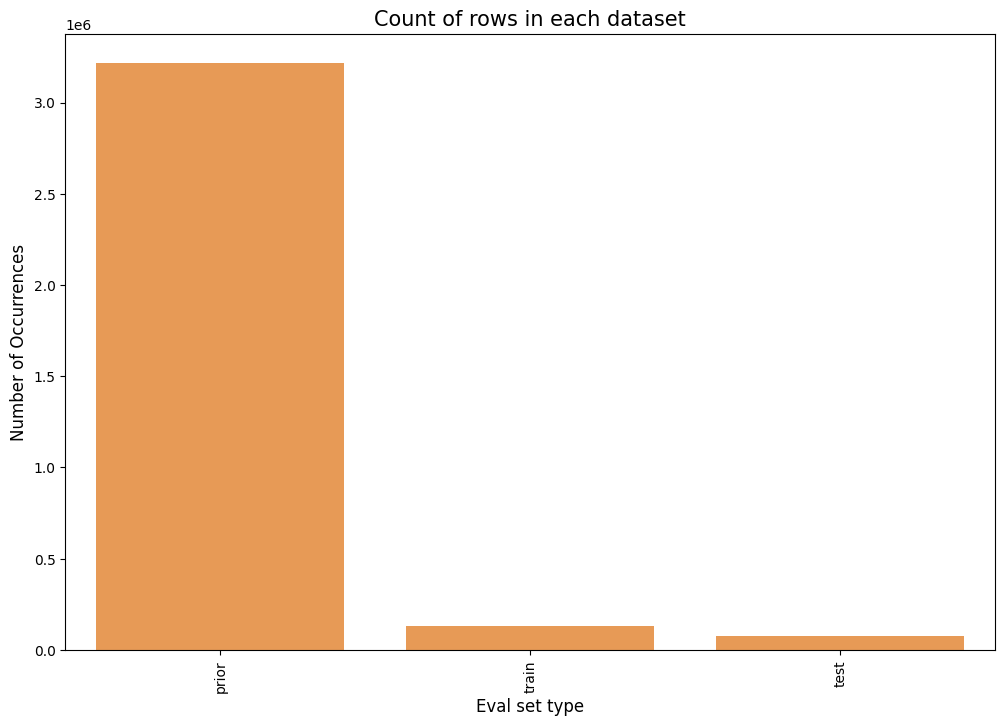

In [6]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize = (12, 8))
sns.barplot(x = cnt_srs.index, y = cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Eval set type', fontsize = 12)
plt.title('Count of rows in each dataset', fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.show()

In [7]:
def get_unique_count(x):
  return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

,user_id
eval_set,
prior,206209
test,75000
train,131209


<ipython-input-8-5e4ff854b740>:1: FutureWarning: The provided callable <function max at 0x7ee93670f9a0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs = orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()


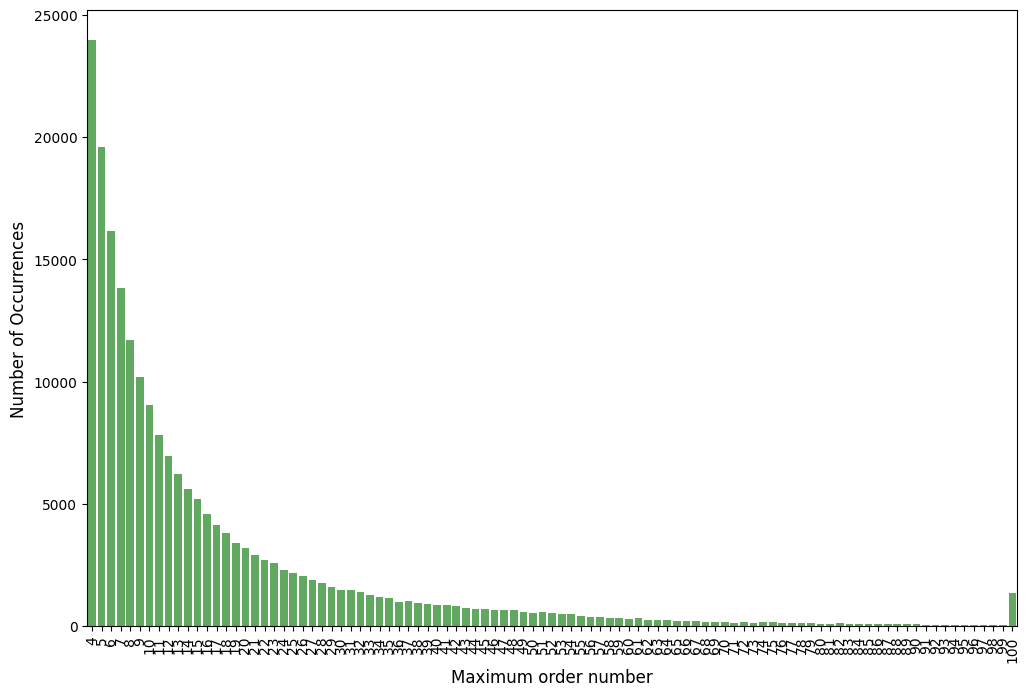

In [8]:
cnt_srs = orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize = (12, 8))
sns.barplot(x = cnt_srs.index, y = cnt_srs.values, alpha = 0.8, color = color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

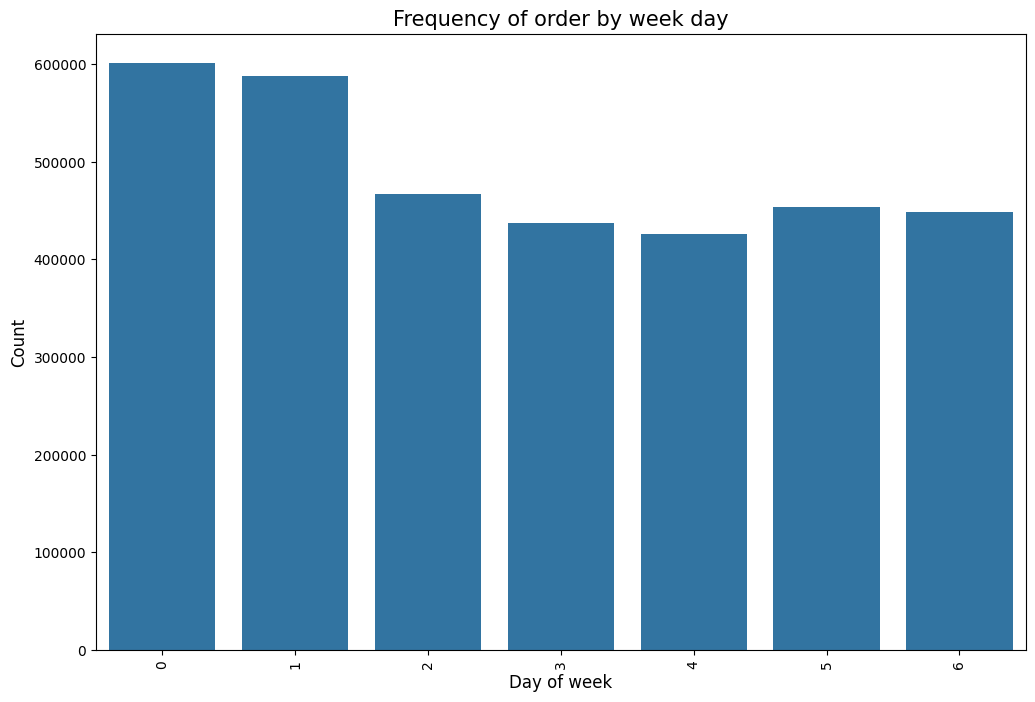

In [9]:
plt.figure(figsize = (12, 8))
sns.countplot(x = 'order_dow', data = orders_df, color = color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

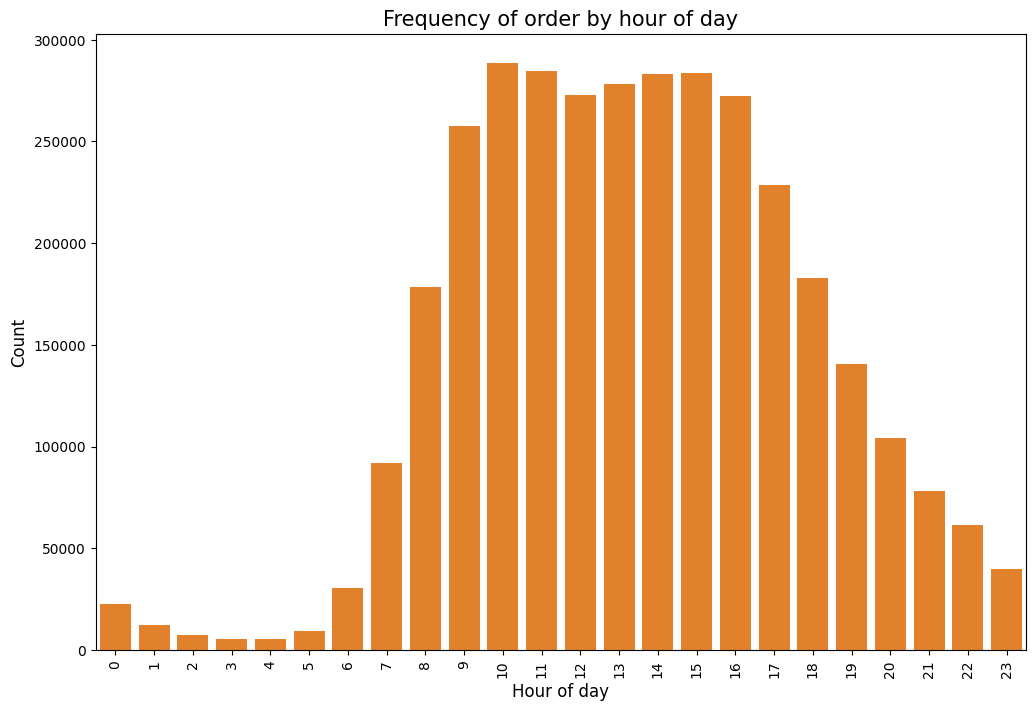

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

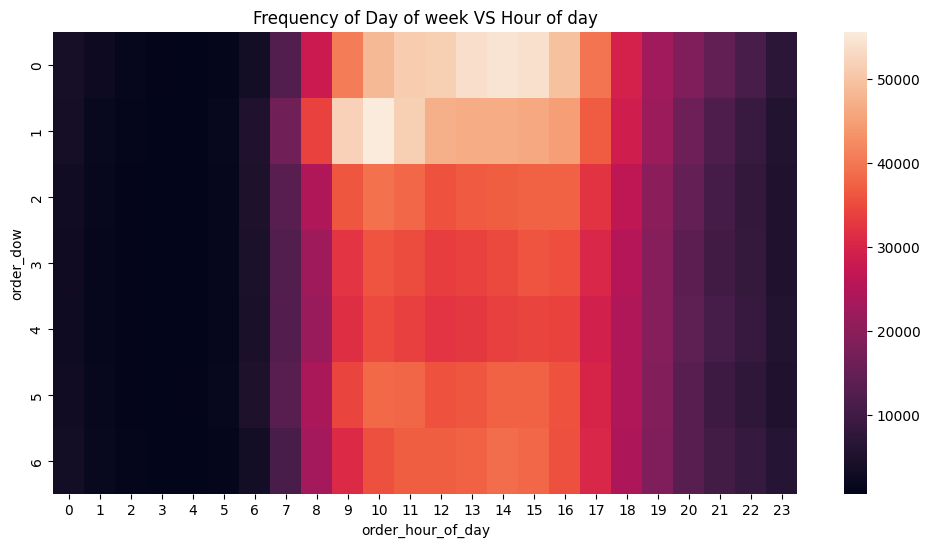

In [11]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot(index = 'order_dow', columns = 'order_hour_of_day', values = 'order_number')

plt.figure(figsize = (12, 6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week VS Hour of day")
plt.show()

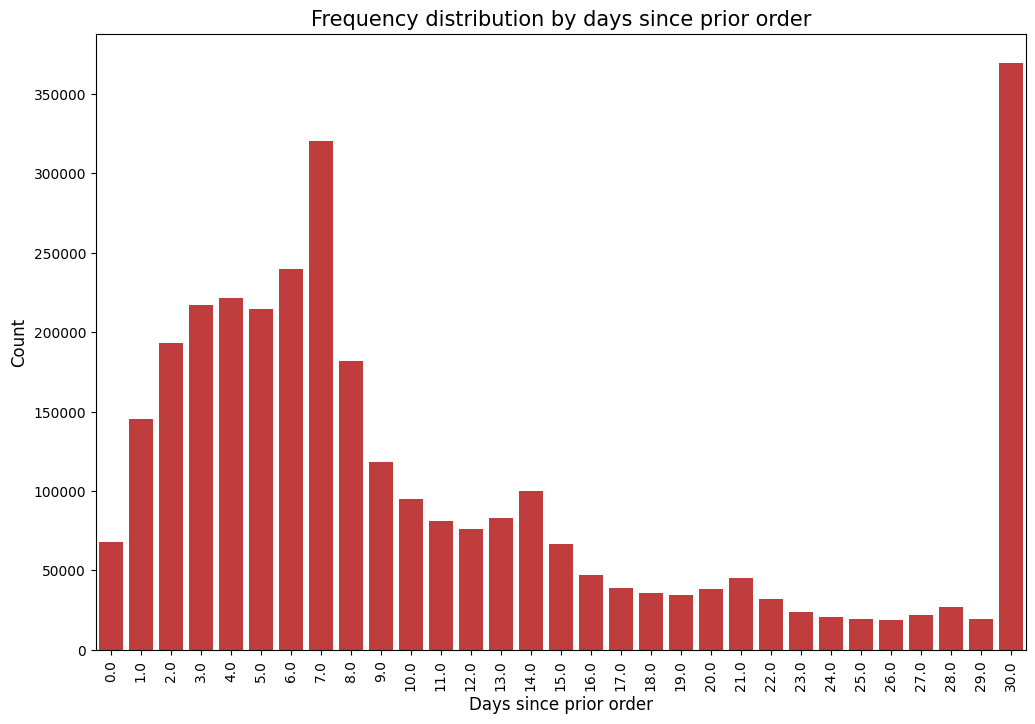

In [12]:
plt.figure(figsize = (12, 8))
sns.countplot(x = 'days_since_prior_order', data = orders_df, color = color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [13]:
order_products_prior_df.reordered.sum()/order_products_prior_df.shape[0]

0.5896974667922161

In [14]:
order_products_train_df.reordered.sum()/order_products_train_df.shape[0]

0.5985944127509629

In [15]:
grouped_df = order_products_prior_df.groupby('order_id')['reordered'].aggregate('sum').reset_index()
grouped_df[grouped_df['reordered']>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

,count
reordered,
1,0.879151
0,0.120849


In [16]:
grouped_df = order_products_train_df.groupby('order_id')['reordered'].aggregate('sum').reset_index()
grouped_df[grouped_df['reordered']>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

,count
reordered,
1,0.93444
0,0.06556


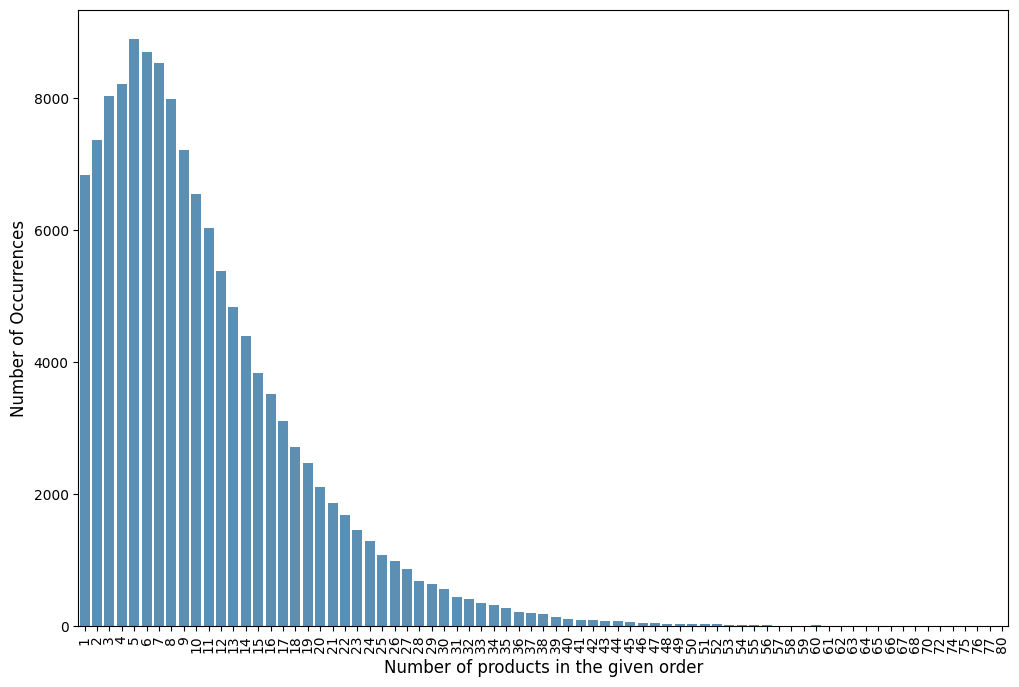

In [17]:
grouped_df = order_products_train_df.groupby('order_id')['add_to_cart_order'].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x = cnt_srs.index, y = cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [18]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [19]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [20]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [21]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on = 'product_id', how = 'left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on = 'aisle_id', how = 'left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on = 'department_id', how = 'left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [22]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


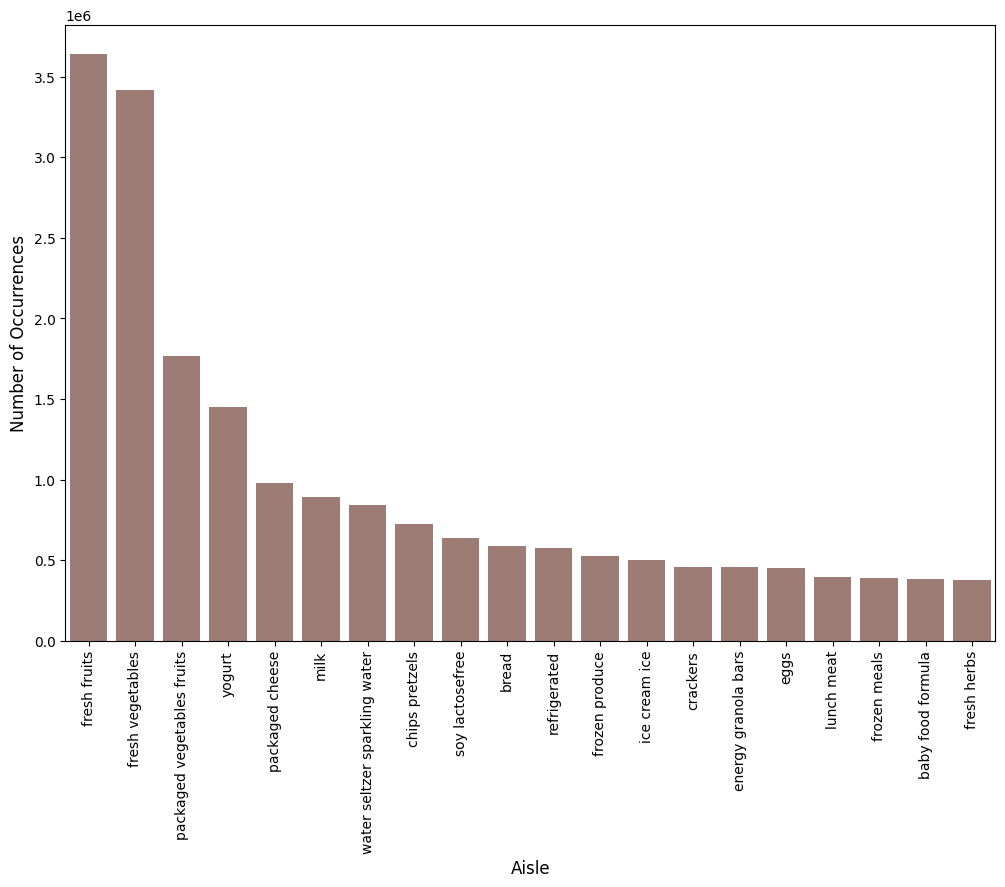

In [23]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize = (12, 8))
sns.barplot(x = cnt_srs.index, y = cnt_srs.values, alpha = 0.8, color = color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

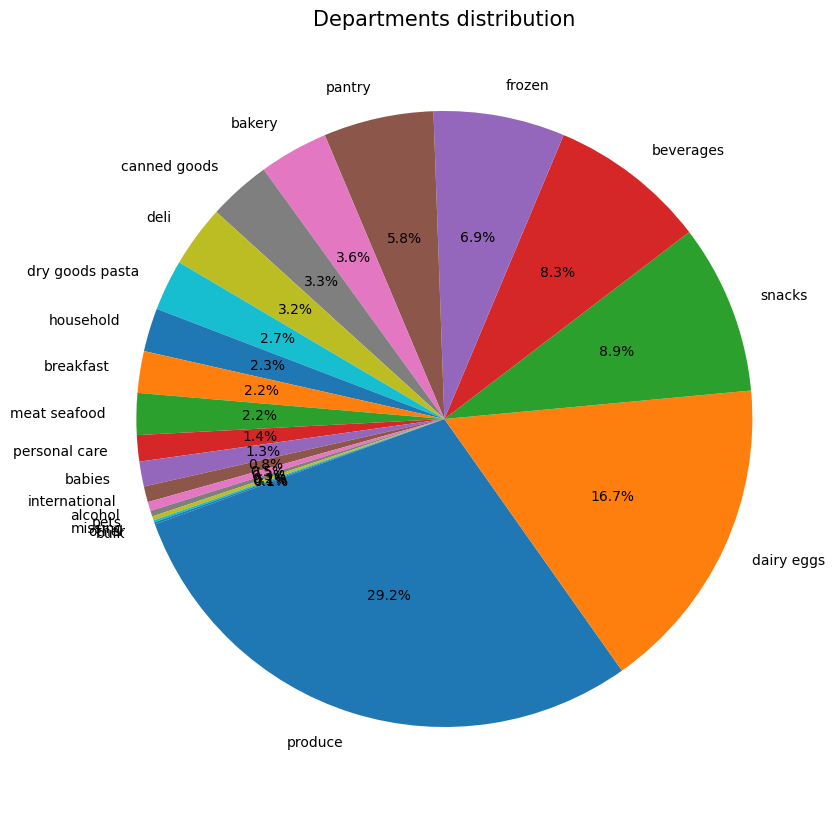

In [24]:
plt.figure(figsize = (10, 10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 200)
plt.title("Departments distribution", fontsize = 15)
plt.show()

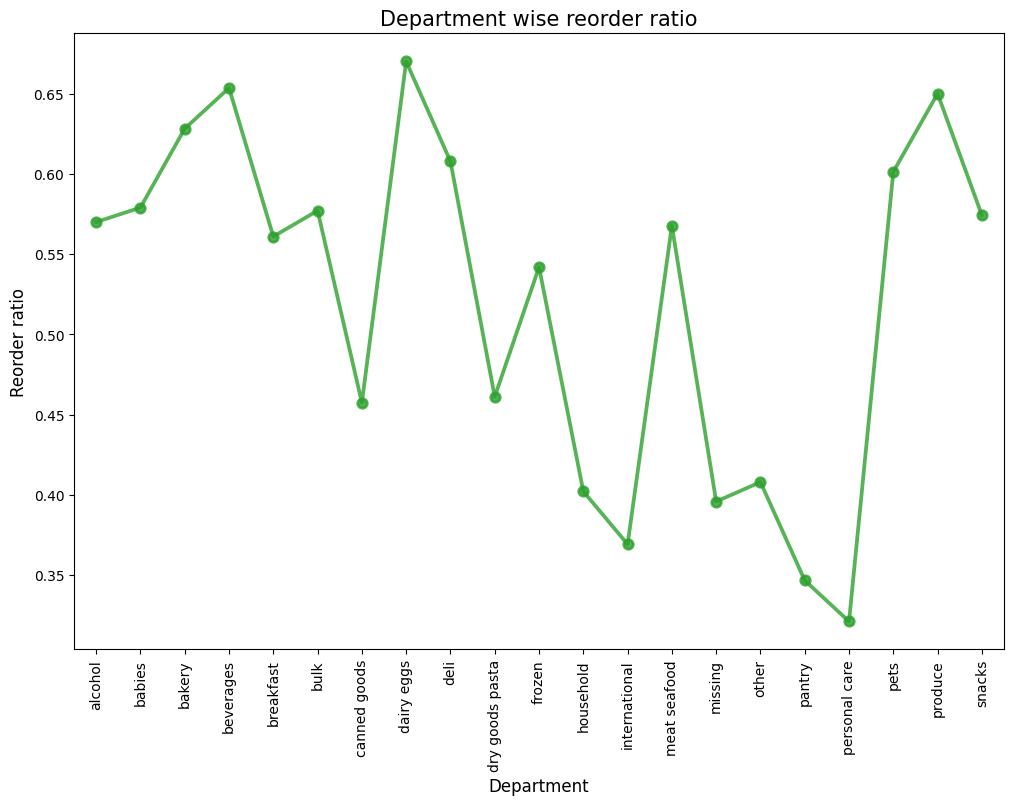

In [25]:
grouped_df = order_products_prior_df.groupby(['department'])["reordered"].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x = grouped_df['department'].values, y = grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

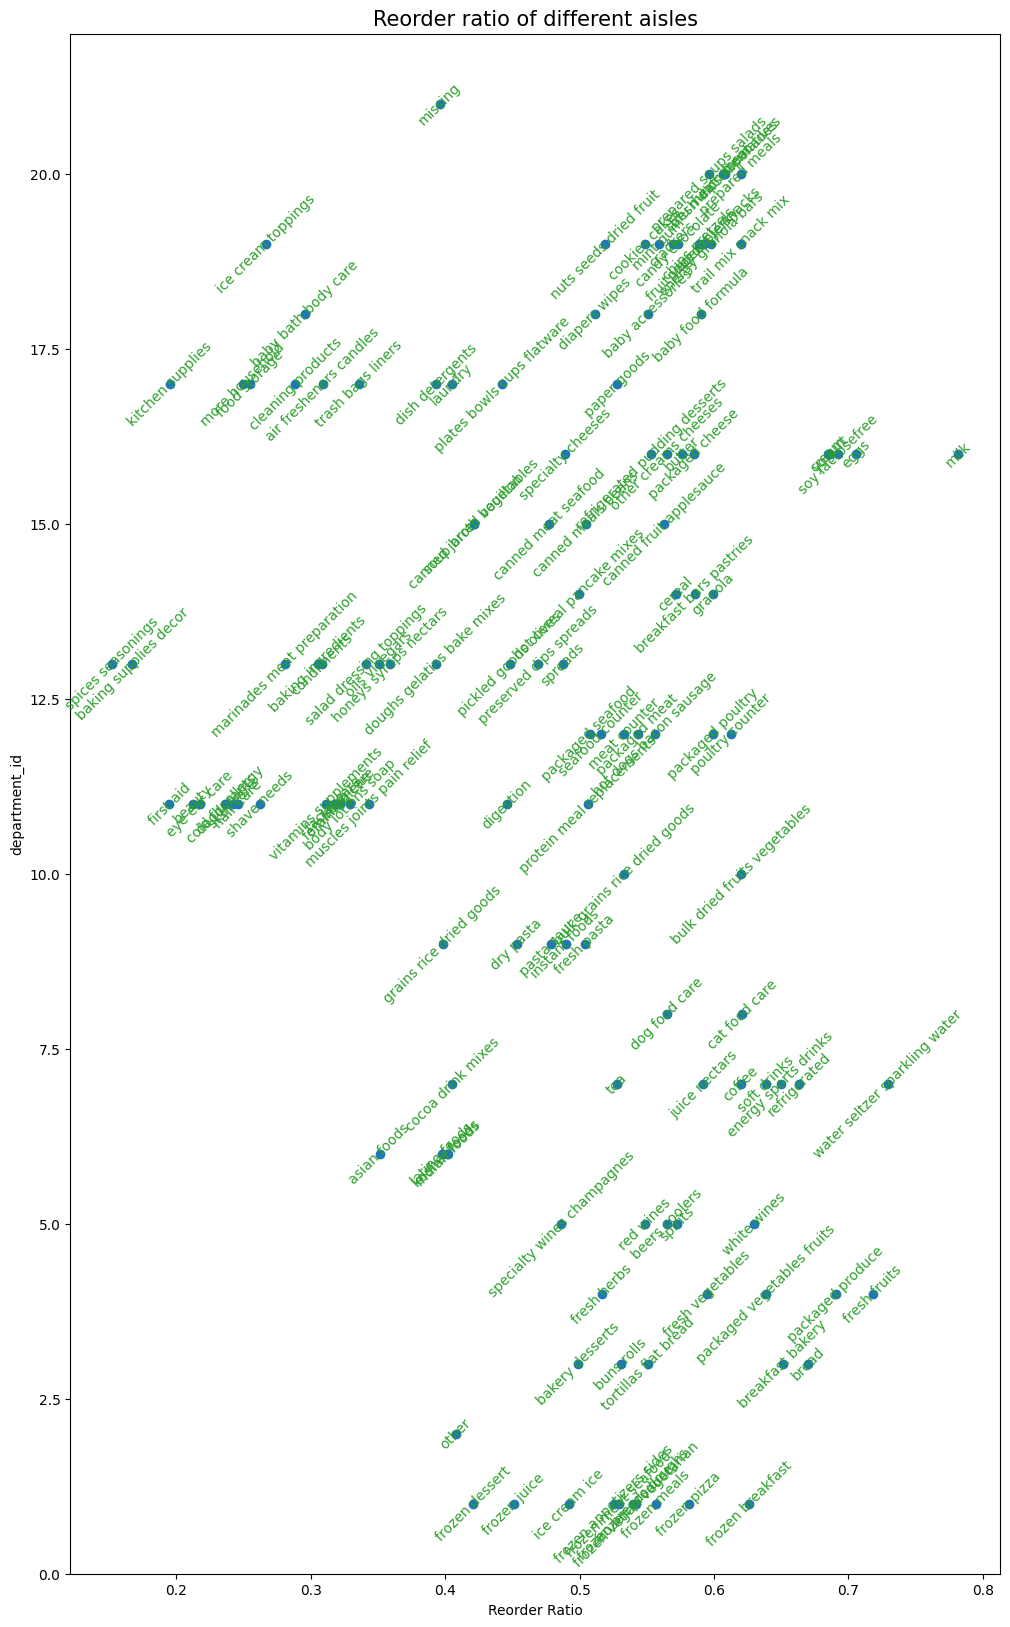

In [26]:
grouped_df = order_products_prior_df.groupby(['department_id', 'aisle'])['reordered'].aggregate('mean').reset_index()

fig, ax = plt.subplots(figsize = (12, 20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
  ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation = 45, ha = 'center', va = 'center', color = color[2])
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title('Reorder ratio of different aisles', fontsize = 15)
plt.show()

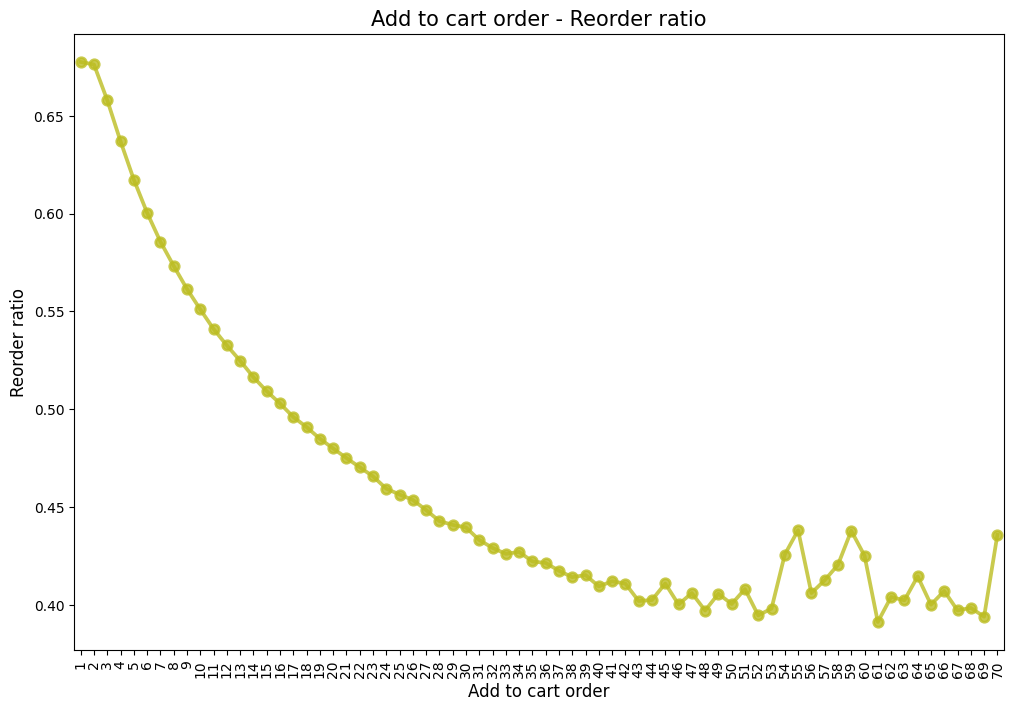

In [27]:
order_products_prior_df['add_to_cart_order_mod'] = order_products_prior_df['add_to_cart_order'].copy()
order_products_prior_df.loc[order_products_prior_df['add_to_cart_order_mod'] > 70, 'add_to_cart_order_mod'] = 70
grouped_df = order_products_prior_df.groupby(['add_to_cart_order_mod'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize = (12, 8))
sns.pointplot(x = grouped_df['add_to_cart_order_mod'].values, y = grouped_df['reordered'].values, alpha = 0.8, color = color[8])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

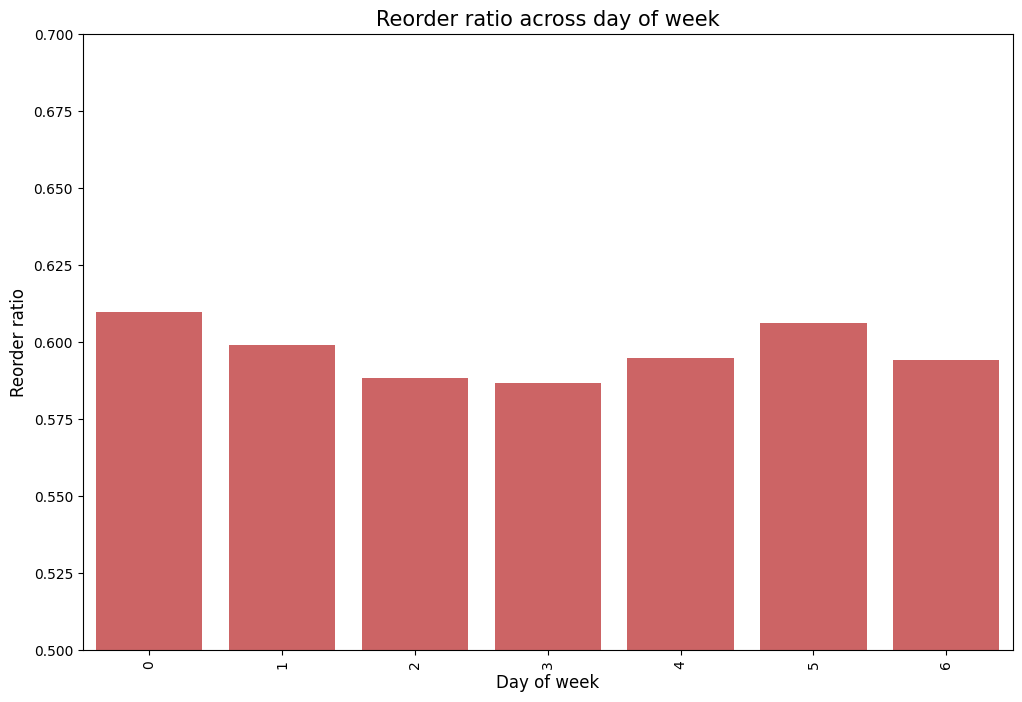

In [28]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on = 'order_id', how = 'left')
grouped_df = order_products_train_df.groupby(['order_dow'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize = (12, 8))
sns.barplot(x = grouped_df['order_dow'].values, y = grouped_df['reordered'].values, alpha = 0.8, color = color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

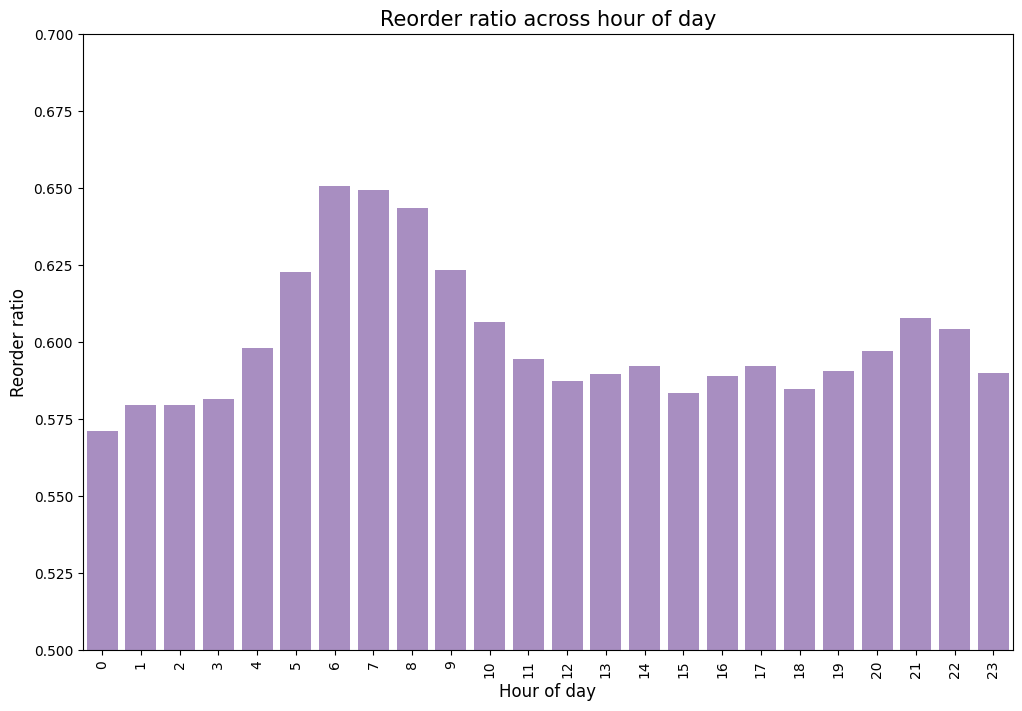

In [29]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x = grouped_df['order_hour_of_day'].values, y = grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

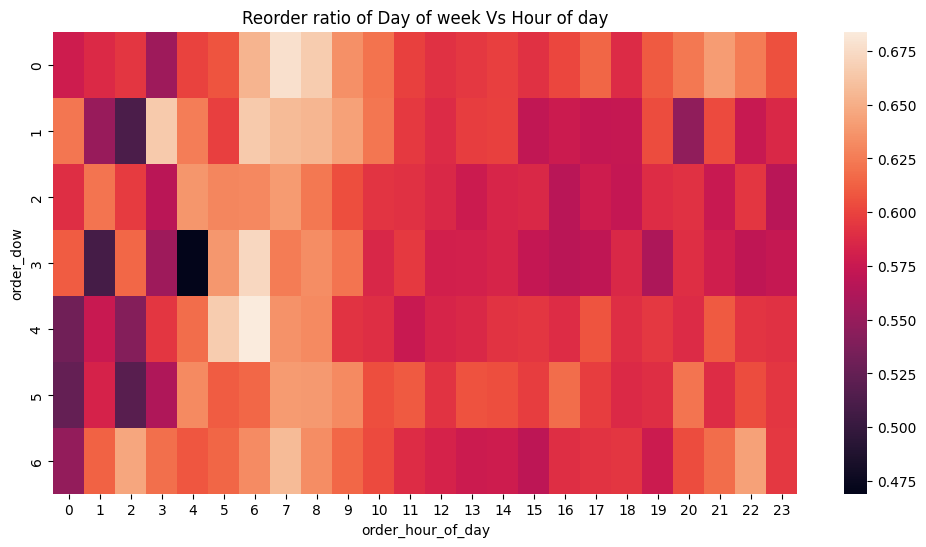

In [30]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot(index = 'order_dow', columns = 'order_hour_of_day', values = 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

##추가분석

목표가 소비자의 다음 주문을 예측하는 것이므로 소비자들이 이전에 장바구니에 넣은 제품의 카테고리와 그 다음에 넣은 제품의 카테고리의 유사성을 살펴보고자 함

In [31]:
#matched 변수를 새로 만들어서 소비자 별로 i번째 department와 i-1번째 department가 일치하면 1, 아니면 0을 할당함

order_products_prior_df['matched'] = 0

order_products_prior_df['matched'] = np.where(
    (order_products_prior_df['order_id'].shift() == order_products_prior_df['order_id']) &
    (order_products_prior_df['department'].shift() == order_products_prior_df['department']),
    1, 0
)

order_products_prior_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,add_to_cart_order_mod,matched
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,1,0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,2,0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,3,0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,4,1
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,5,1
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,6,0
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry,7,0
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry,8,1
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,9,0
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs,1,0


In [32]:
#matched_rate는 order_id 별로 matched된 비율을 가지고 있는 데이터임

matched_rate = order_products_prior_df.groupby('order_id')['matched'].aggregate('mean')
matched_rate.head()

,matched
order_id,
2,0.333333
3,0.250000
4,0.538462
5,0.076923
6,0.333333


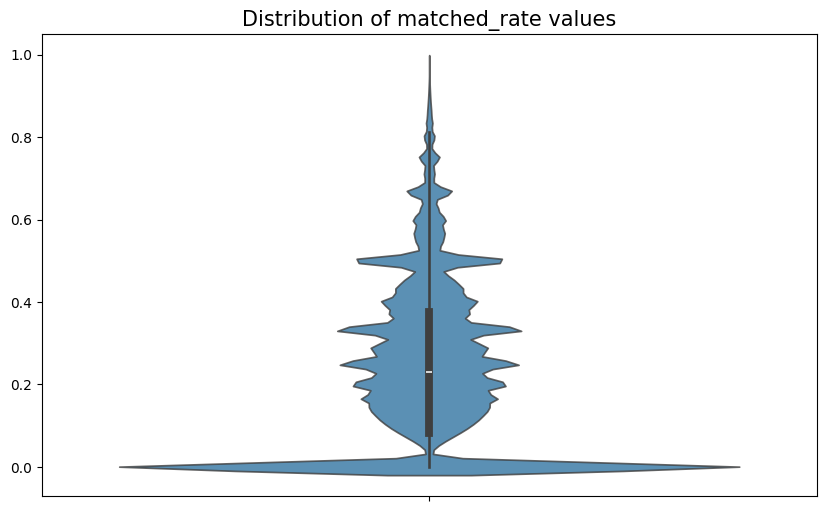

In [33]:
#바이올린 플롯으로 분포를 확인하니 0%인 경우가 가장 많았음
#하나의 물품만을 구매한 order_id의 경우에는 0/1로 계산되기 때문에 해당 결과가 나타난 것으로 파악함

plt.figure(figsize=(10, 6))
sns.violinplot(matched_rate.values, alpha = 0.8)

plt.title('Distribution of matched_rate values', fontsize = 15)
plt.show()

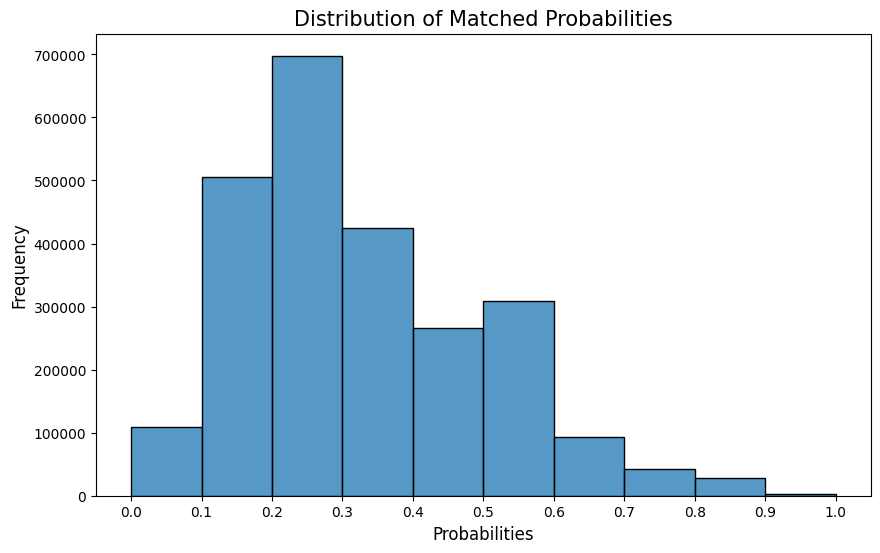

In [34]:
#유의미한 데이터들에 더 집중하려고 0인 데이터를 제외하고 히스토그램과 kde로 분포를 확인함

matched_rate_nonzero = matched_rate[matched_rate.values != 0]

plt.figure(figsize=(10, 6))
sns.histplot(matched_rate_nonzero.values, bins=np.arange(0, 1.1, 0.1), kde = False)

plt.xlabel('Probabilities', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Matched Probabilities', fontsize=15)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()

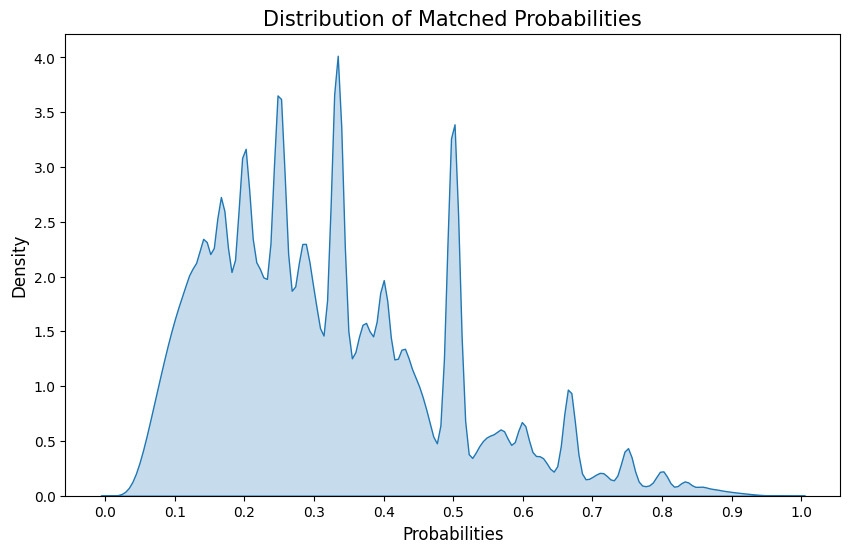

In [35]:
#히스토그램보다 자세한 분포를 파악하기 위해 kde 플롯도 확인해봤음

plt.figure(figsize=(10, 6))
sns.kdeplot(matched_rate_nonzero.values, fill = True)

plt.xlabel('Probabilities', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Matched Probabilities', fontsize=15)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()

###Conclusion

33%, 25%, 50%에 가장 많은 빈도가 나타났고, 0에서 0.1구간에 많은 빈도가 나타나지 않은 것으로 봤을 때, 앞에 장바구니에 넣은 상품의 카테고리가 뒤에 장바구니에 넣은 상품의 카테고리에 영향을 끼치지 않는다고 할 수 없다.